# Titanic

Se adjunta un dataset sobre el desastre del Titanic para hacer ejercicios libres.

Algunos ejercicios que puedes llegar a realizar son:

* Ver el número de valores nulos
* Representar el porcentaje de filas con atributos nulos.
* Limpieza de columnas.
* Saber la edad mínima y máxima de las personas del barco.
* Conocer la mediana de las edades.
* Ver los precios (columna `fares`) más altos y bajos.
* Número de pasajeros embarcados (columna `Embarked`).
* Ver la distribución de sexos en las personas embarcadas.



### Importar librerias

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
#import ace_tools as tools
import io

In [10]:
warnings.filterwarnings("ignore")
 
# Forzar el renderizado en Jupyter Notebook
pio.renderers.default = 'notebook'

### Leer el DataSet

In [11]:
df = pd.read_csv('datos/titanic.csv')#importar dataset
df.info()#vericar 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
#buffer = io.StringIO()
#df.info(buf=buffer)

# Obtener el contenido del buffer
#info_str = buffer.getvalue()

# Convertir el contenido a un DataFrame para guardarlo en Excel
#info_df = pd.DataFrame([line.split() for line in info_str.splitlines()])

# Guardar el DataFrame en un archivo Excel
#info_df.to_excel('informacion_df.xlsx', index=False, header=False)

### Ver el número de valores nulos

In [13]:
null_counts = df.isnull().sum() #sumamos los valores NaN por columna
print(null_counts) #imprir los NaN por columna.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Representar el porcentaje de filas con atributos nulos.

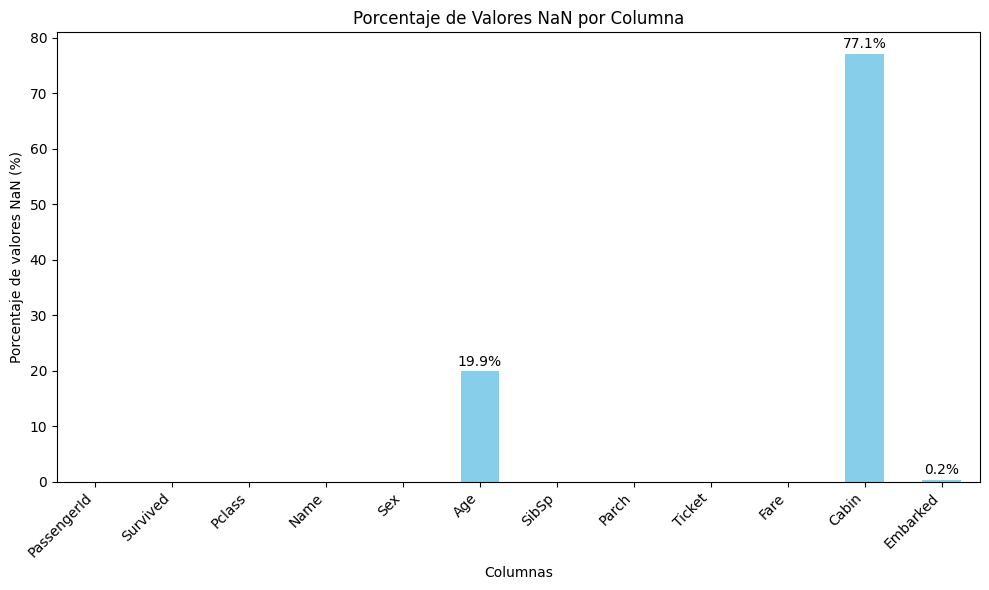

In [14]:
percentage = df.isnull().mean() * 100 #calculo de porcentaje de valores nulos por columna

plt.figure(figsize=(10, 6))
percentage.plot(kind='bar', color='skyblue') 

for i, porcentage in enumerate(percentage):
    if porcentage > 0: #para columnas con NaN
        plt.text(i, porcentage + 0.5, f'{porcentage:.1f}%', ha='center', va='bottom', fontsize=10)

plt.title('Porcentaje de Valores NaN por Columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de valores NaN (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Limpieza de columnas.
1. Eliminar campos nulos identificados. 
2. Identificar y corregir valores incorrectos e inconsistentes. 

In [15]:
#Reemplazar valores NaN por la media de la columna, cambiar de formato float a int
media_age = round(df['Age'].mean())
print(media_age)
df['Age'] = df['Age'].fillna(media_age)
#df['Age'] = df['Age'].astype(int)
df['Age']

30


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### Alternativa optimizada para eliminar valores nulos de la columna 'Age' utilizando el método KNN

In [16]:
dfKNN = pd.read_csv('datos/titanicKNN-2.csv')#importar dataset con valores nulos eliminados de 'Age'
dfKNN.info()#vericar 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex_encoded  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


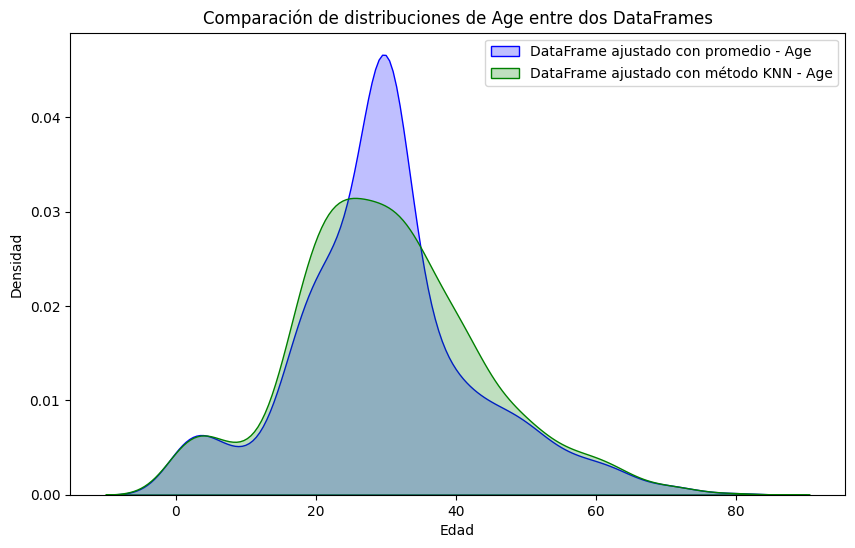

In [17]:
plt.figure(figsize=(10, 6))

# Usamos seaborn para crear el gráfico de densidad
sns.kdeplot(df['Age'], label='DataFrame ajustado con promedio - Age', shade=True, color='blue')
sns.kdeplot(dfKNN['Age'], label='DataFrame ajustado con método KNN - Age', shade=True, color='green')

# Añadimos título y etiquetas
plt.title('Comparación de distribuciones de Age entre dos DataFrames')
plt.xlabel('Edad')
plt.ylabel('Densidad')

# Mostramos la leyenda
plt.legend()

# Mostramos el gráfico
plt.show()

In [18]:
#desde este punto usamos el DataFrame con la columna Age imputada por el método KNN
df = pd.read_csv('datos/titanicKNN-2.csv')#importar dataset
df.info()#vericar 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex_encoded  891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


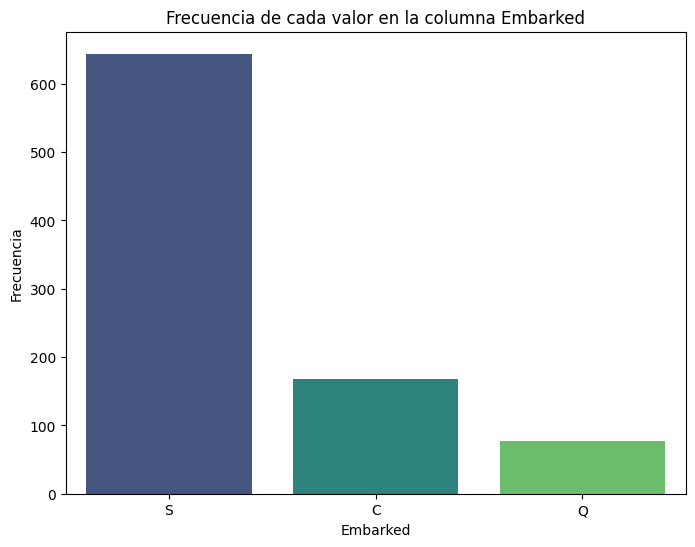

In [19]:
#Graficar los datos de la columna 'Embarked' para entender su distribución. 
embarked_counts = df['Embarked'].value_counts()
# Crear un diccionario para mapear los códigos de los puertos con los nombres completos
port_names = {'S': 'Southampton(S)', 'C': 'Cherburgo(C)', 'Q': 'Queenstown(Q)'}

plt.figure(figsize=(8, 6))
sns.barplot(x=embarked_counts.index, y=embarked_counts.values, palette='viridis')
plt.title('Frecuencia de cada valor en la columna Embarked')
plt.xlabel('Embarked')
plt.ylabel('Frecuencia')
plt.show()

In [20]:
#reemplazar los valores Nan de la columna 'Embarked'por la moda de la misma. 
moda_Embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(moda_Embarked)

In [21]:
#Para tratar los valores NaN de la columna 'Cabin' que representa más del 75% de la misma,
#la teoria sugiere eliminar la columna para mantener la integridad del DataSet, 
#para no realizar este desmembramiento la 2da opción es reemplazar 'NaN' por 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Cabin']

0      Unknown
1          C85
2      Unknown
3         C123
4      Unknown
        ...   
886    Unknown
887        B42
888    Unknown
889       C148
890    Unknown
Name: Cabin, Length: 891, dtype: object

In [22]:
#utilizamos la función describe para evaluar los datos, en busqueda de valores inconsistentes. 
df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,30.094250,0.523008,0.381594,32.204208,0.647587
std,257.353842,0.486592,0.836071,13.601891,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.666667,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


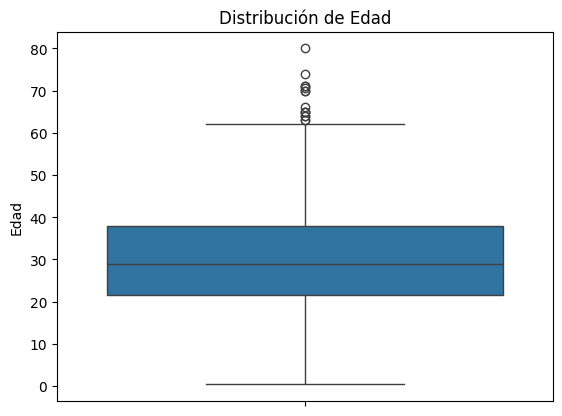

In [23]:
sns.boxplot(data=df['Age'])# boxplot muestra la mediana, cuartiles y valores atípicos de una columna
#este grafico se replico para todas las columnas númericas sin identicar valores atípicos.

plt.title('Distribución de Edad')
#plt.xlabel('Edad')
plt.ylabel('Edad')

# Mostrar el gráfico
plt.show()

In [24]:
#con la función 'unique' buscamos valores inconsistentes en columnas que deben mantener un cierto rango de datos.
print(df['Sex'].unique())
print(df['Pclass'].unique())
print(df['Survived'].unique())
print(df['SibSp'].unique())
print(df['Parch'].unique())
#df.head()

['male' 'female']
[3 1 2]
[0 1]
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]


In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,1


### Conocer la edad mínima y máxima de las personas del barco.

In [26]:
min_age = df['Age'].min()#identificar menor edad
max_age = df['Age'].max()#identificar mayor edad

print(f"La menor edad es: {min_age}")
print(f"La mayor edad es: {max_age}")

La menor edad es: 0.42
La mayor edad es: 80.0


In [27]:
# Calcular el total de hombres y mujeres en la columna 'Sex'
total_sex = df['Sex'].value_counts()
print(total_sex)

Sex
male      577
female    314
Name: count, dtype: int64


### Histograma de Edades

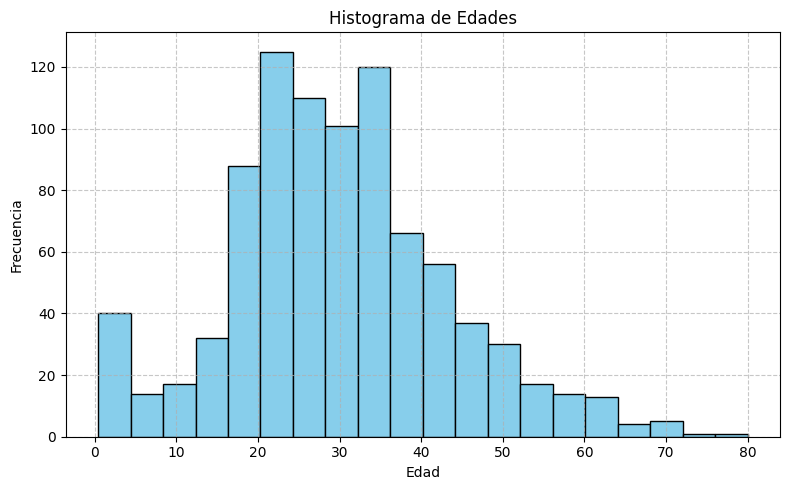

In [28]:
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

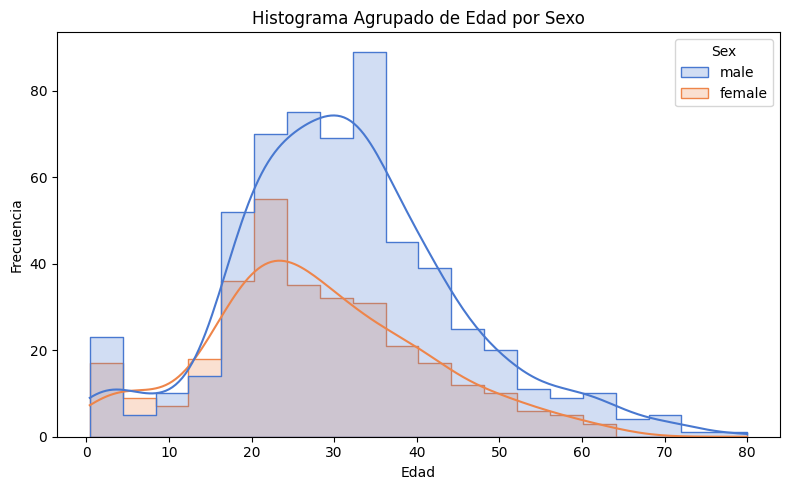

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, 
            # labels={'Sex': 'Sexo', 'male': 'Masculino', 'female': 'Femenino'},
             x='Age', hue='Sex', bins=20, kde=True, palette='muted', element='step')
plt.title('Histograma Agrupado de Edad por Sexo')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
#plt.legend(title="Sexo")
plt.tight_layout()
plt.show()

In [30]:
# Calcular el total de pasajeros por clase
total_pclass = df['Pclass'].value_counts()

print(total_pclass)


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


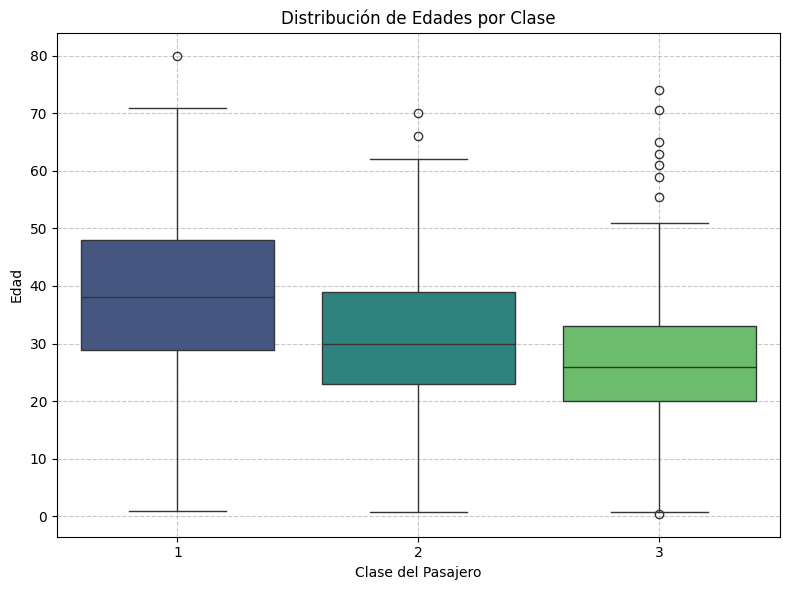

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=df, palette='viridis')
plt.title('Distribución de Edades por Clase')
plt.xlabel('Clase del Pasajero')
plt.ylabel('Edad')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [32]:
import plotly.io as pio

# Asegúrate de que Plotly esté configurado para trabajar con Jupyter Notebook
pio.renderers.default = 'jupyterlab'

In [33]:
fig = px.box(df, x='Pclass', y='Age', 
             title='Distribución de Edades por Clase de Pasajero',
             labels={'Pclass': 'Clase del Pasajero', 'Age': 'Edad'},
             color='Pclass',  # Color según la clase del pasajero
             hover_data=['Age']) 

fig.show()

### Ver los precios (columna `fares`) más altos y bajos.

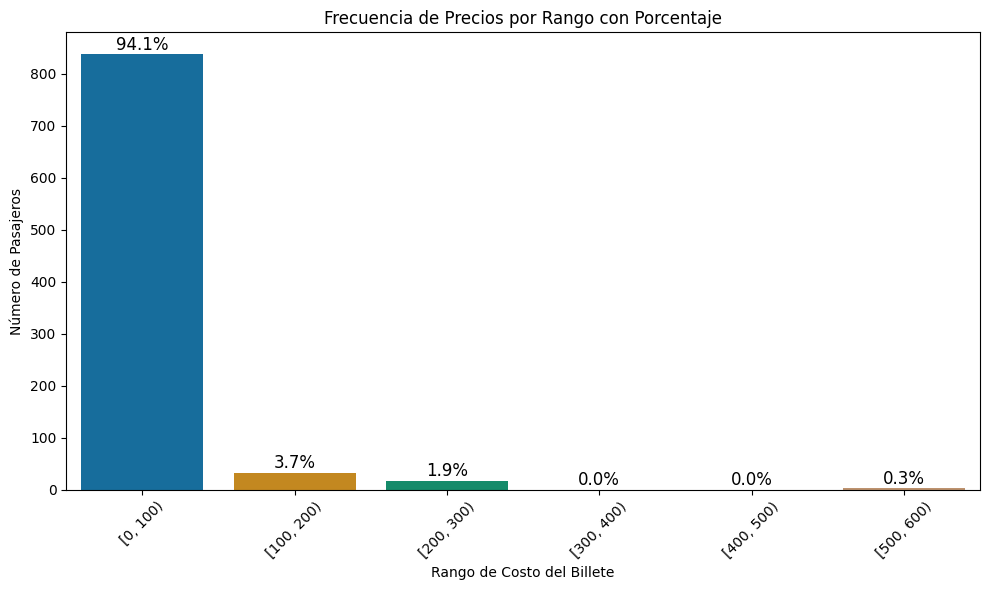

In [34]:
# Agrupar los precios en rangos
df['Fare_Range'] = pd.cut(df['Fare'], bins=[0, 100, 200, 300, 400, 500, 600], right=False)

# Calcular la frecuencia de cada rango
fare_counts = df['Fare_Range'].value_counts().sort_index()

# Calcular el porcentaje de cada rango
fare_percentage = (fare_counts / fare_counts.sum()) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=fare_counts.index.astype(str), y=fare_counts.values, palette='colorblind')

# Añadir el porcentaje sobre cada barra
for i, (count, percent) in enumerate(zip(fare_counts.values, fare_percentage.values)):
    plt.text(i, count + 1, f'{percent:.1f}%', ha='center', va='bottom', fontsize=12)

# Configurar el gráfico
plt.title('Frecuencia de Precios por Rango con Porcentaje')
plt.xlabel('Rango de Costo del Billete')
plt.ylabel('Número de Pasajeros')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [35]:
fare_total_by_class = df.groupby('Pclass')['Fare'].sum()
passenger_count_by_class = df['Pclass'].value_counts().sort_index()
summary_df = pd.DataFrame({
    'Pclass': [1, 2, 3],
    'Monto Total': fare_total_by_class.values,
    'Cantidad de Pasajeros': passenger_count_by_class.values
})

# Crear el gráfico de dispersión con Plotly
fig = px.scatter(summary_df, 
                 x='Cantidad de Pasajeros', 
                 y='Monto Total', 
                 size='Monto Total', 
                 color='Pclass',
                 labels={'Pclass': 'Clase del Pasajero'},
                 title='Relación entre Monto Total de Billetes y Cantidad de Pasajeros por Clase',
                 size_max=60)

fig.show()

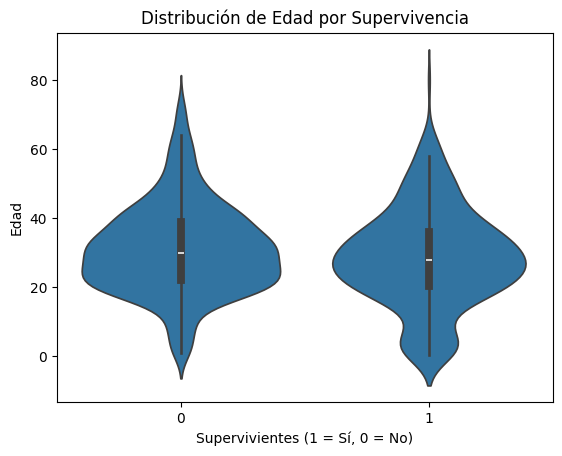

In [36]:
# Crear un gráfico de violín para mostrar la distribución de edades por supervivencia
sns.violinplot(data=df, x='Survived', y='Age')

# Agregar título y etiquetas a los ejes
plt.title('Distribución de Edad por Supervivencia')
plt.xlabel('Supervivientes (1 = Sí, 0 = No)')
plt.ylabel('Edad')

# Mostrar el gráfico
plt.show()

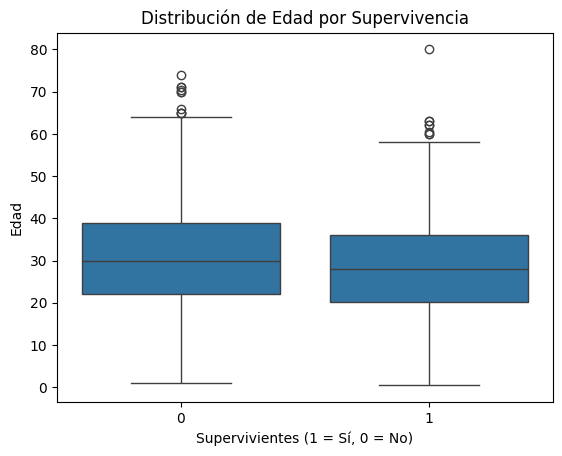

In [37]:
# Crear un boxplot para mostrar la distribución de edades por supervivencia
sns.boxplot(data=df, x='Survived', y='Age')

# Agregar título y etiquetas a los ejes
plt.title('Distribución de Edad por Supervivencia')
plt.xlabel('Supervivientes (1 = Sí, 0 = No)')
plt.ylabel('Edad')

# Mostrar el gráfico
plt.show()

In [38]:
# Contar la cantidad de pasajeros por Pclass, Sex y Survived
grouped_data = df.groupby(['Pclass', 'Sex', 'Survived']).size().reset_index(name='PassengerCount')
#df['Survived'] = df['Survived'].map({0: 'NO', 1: 'SI'})

fig = px.bar(
    grouped_data,
    x='Pclass',
    y='PassengerCount',
    color='Survived',
    barmode='group',
    text='PassengerCount',
    facet_col='Sex',
    labels={'Pclass': 'Clase del Pasajero', 'PassengerCount': 'Número de Pasajeros', 'Survived': 'Sobrevivió'},
    title='Distribución de Pasajeros por Clase, Sexo y Supervivencia',
    color_discrete_map={0: 'blue', 1: 'red'},
    opacity=0.8,
    template='seaborn'
)
fig.show()

In [39]:
# Crear un gráfico 3D usando Plotly Express
fig = px.scatter_3d(
    df, 
    x='SibSp',  # Número de hermanos/esposos a bordo
    y='Parch',  # Número de padres/hijos a bordo
    z='Fare',   # Tarifa pagada
    color='Survived',  # Usamos la columna 'Survived' para colorear los puntos
    size='Fare',  # Tamaño de los puntos según la tarifa
    hover_data=['Name'],  # Mostrar el nombre del pasajero al pasar el cursor
    labels={'SibSp': 'Hermanos/Esposos', 'Parch': 'Padres/Hijos', 'Fare': 'Tarifa'},
    title='Relación entre Hermanos/Esposos, Padres/Hijos y Tarifa en el Titanic'
)

# Mostrar el gráfico
fig.show()

<Figure size 800x600 with 0 Axes>

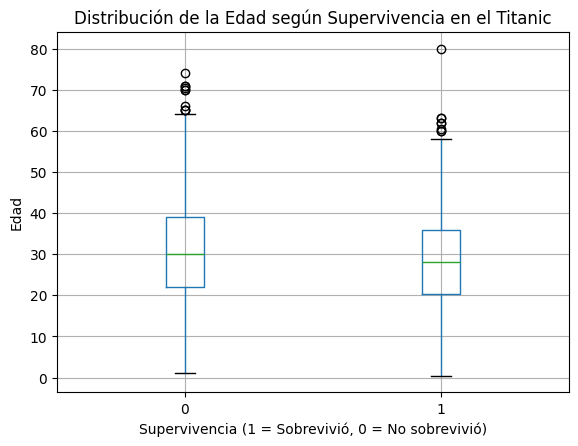

In [40]:
# Crear un gráfico de caja (boxplot) para comparar Edad y Supervivencia
plt.figure(figsize=(8, 6))
df.boxplot(column='Age', by='Survived', grid=True)
plt.title('Distribución de la Edad según Supervivencia en el Titanic')
plt.suptitle('')
plt.xlabel('Supervivencia (1 = Sobrevivió, 0 = No sobrevivió)')
plt.ylabel('Edad')
plt.show()

In [41]:
# Extraer los títulos de la columna 'Name'
df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)

# Crear una tabla comparativa entre los títulos y la columna 'Survived'
title_survival = df.groupby('Title')['Survived'].value_counts().unstack()

# Mostrar la tabla resultante
print(title_survival)

Survived          0      1
Title                     
Capt            1.0    NaN
Col             1.0    1.0
Don             1.0    NaN
Dr              4.0    3.0
Jonkheer        1.0    NaN
Lady            NaN    1.0
Major           1.0    1.0
Master         17.0   23.0
Miss           55.0  127.0
Mlle            NaN    2.0
Mme             NaN    1.0
Mr            436.0   81.0
Mrs            26.0   99.0
Ms              NaN    1.0
Rev             6.0    NaN
Sir             NaN    1.0
the Countess    NaN    1.0


In [42]:
# Agrupar los títulos en categorías
def categorize_title(title):
    if title in ['Capt', 'Col', 'Major', 'Sir']:
        return 'Militar'
    elif title in ['Rev']:
        return 'Religioso'
    elif title in ['Countess', 'Lady', 'the Countess', 'Jonkheer', 'Don']:
        return 'Realeza'
    elif title in ['Dr', 'Mlle', 'Mme', 'Ms']:
        return 'Alta Sociedad'
    elif title in ['Master']:
        return 'Niños'
    elif title in ['Mrs']:
        return 'Mujeres Casadas'
    elif title in ['Miss']:
        return 'Mujeres Solteras'
    else:
        return 'Hombres'

# Aplicar la función para categorizar los títulos
df['Title_Group'] = df['Title'].apply(categorize_title)

# Comparar los grupos de títulos con la supervivencia
grouped_survival = df.groupby('Title_Group')['Survived'].value_counts().unstack()

#import ace_tools as tools; tools.display_dataframe_to_user(name="Comparación de grupos de títulos y supervivencia", dataframe=grouped_survival)

grouped_survival

Survived,0,1
Title_Group,,
Alta Sociedad,4.0,7.0
Hombres,436.0,81.0
Militar,3.0,3.0
Mujeres Casadas,26.0,99.0
Mujeres Solteras,55.0,127.0
Niños,17.0,23.0
Realeza,2.0,2.0
Religioso,6.0,NaN


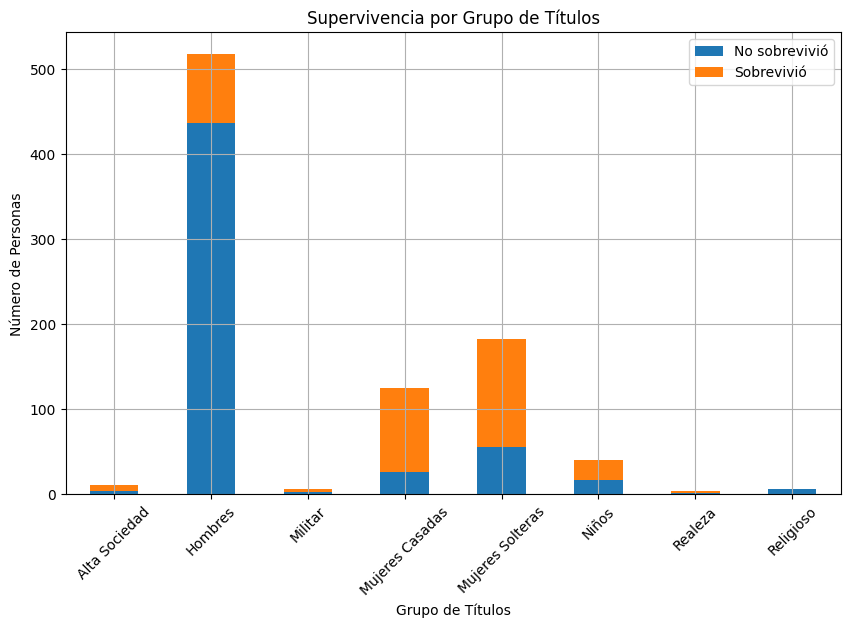

In [43]:
grouped_survival.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Supervivencia por Grupo de Títulos')
plt.xlabel('Grupo de Títulos')
plt.ylabel('Número de Personas')
plt.legend(['No sobrevivió', 'Sobrevivió'], loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)


plt.show()

In [44]:
# Contar cuántos pasajeros comparten el mismo número de Ticket
shared_tickets = df['Ticket'].value_counts()
passengers_with_shared_tickets = shared_tickets[shared_tickets > 1].count()

passengers_with_shared_tickets

np.int64(134)

In [45]:
def define_relationship_group(row):
    if (row['SibSp'] > 0 or row['Parch'] > 0 or df['Ticket'].value_counts()[row['Ticket']] > 1):
        return 'Con vínculo'
    else:
        return 'Sin vínculo'

# Aplicar la función para crear el grupo
df['Relationship_Group'] = df.apply(define_relationship_group, axis=1)

# Comparar los grupos de relación con la columna 'Survived'
relationship_survival = df.groupby('Relationship_Group')['Survived'].value_counts().unstack()

# Mostrar los resultados
relationship_survival

Survived,0,1
Relationship_Group,,
Con vínculo,212,217
Sin vínculo,337,125


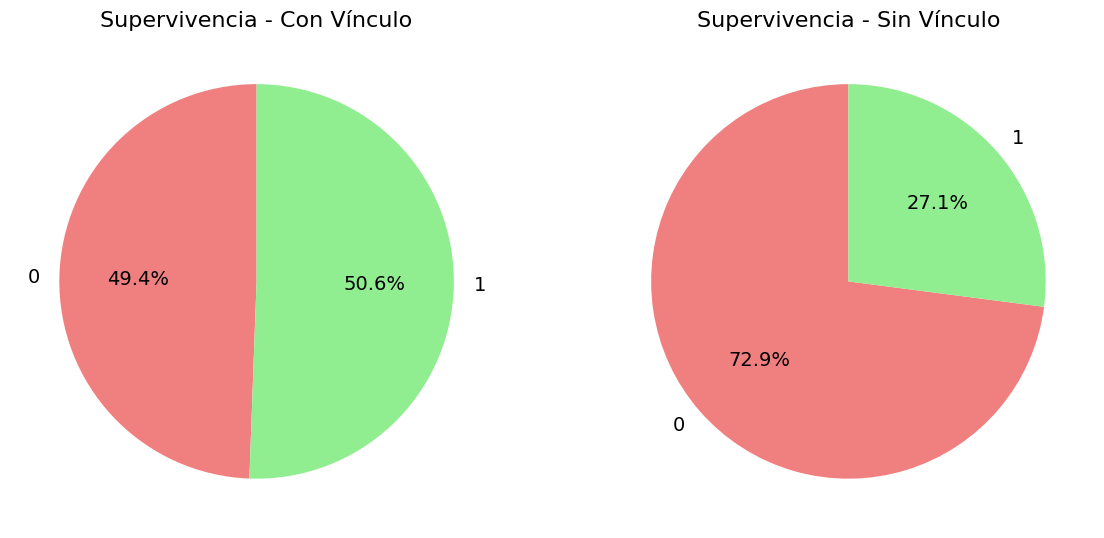

In [46]:
# Crear un gráfico de torta (pie chart) para comparar la proporción de supervivientes y no supervivientes por grupo de relación
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Gráfico para el grupo 'Con vínculo'
relationship_survival.loc['Con vínculo'].plot(
    kind='pie',
    autopct=lambda p: '{:.1f}%'.format(p),  # Personalizar el formato del porcentaje
    ax=ax[0],
    startangle=90,
    colors=['lightcoral', 'lightgreen'],
    legend=False,
    textprops={'fontsize': 14}  # Cambiar el tamaño del texto en las etiquetas
)
ax[0].set_title('Supervivencia - Con Vínculo', fontsize=16)  # Cambiar el tamaño del título
ax[0].set_ylabel('')

# Gráfico para el grupo 'Sin vínculo'
relationship_survival.loc['Sin vínculo'].plot(
    kind='pie',
    autopct=lambda p: '{:.1f}%'.format(p),
    ax=ax[1],
    startangle=90,
    colors=['lightcoral', 'lightgreen'],
    legend=False,
    textprops={'fontsize': 14}  # Cambiar el tamaño del texto en las etiquetas
)
ax[1].set_title('Supervivencia - Sin Vínculo', fontsize=16)  # Cambiar el tamaño del título
ax[1].set_ylabel('')

plt.show()


In [47]:
# Contar la cantidad de pasajeros por puerto de embarque
passengers_per_port = df['Embarked'].value_counts()

# Crear un diccionario para mapear los códigos de los puertos con los nombres completos
port_names = {'S': 'Southampton(S)', 'C': 'Cherburgo(C)', 'Q': 'Queenstown(Q)'}

# Crear una nueva tabla con los nombres completos de los puertos
passengers_per_port_named = passengers_per_port.rename(index=port_names)

# Mostrar la nueva tabla
passengers_per_port_named

Embarked
Southampton(S)    646
Cherburgo(C)      168
Queenstown(Q)      77
Name: count, dtype: int64

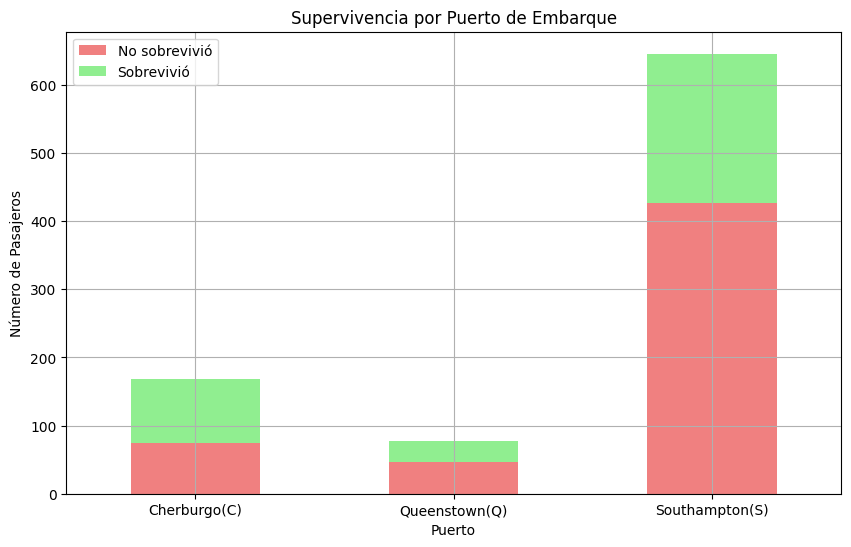

In [48]:
# Calcular la cantidad de sobrevivientes por puerto de embarque
survival_per_port = df.groupby('Embarked')['Survived'].value_counts().unstack()

# Renombrar los índices de la tabla de supervivientes con los nombres completos de los puertos
survival_per_port_named = survival_per_port.rename(index=port_names)
# Graficar un solo gráfico de barras apiladas para la supervivencia por puerto de embarque
survival_per_port_named.plot(kind='bar', figsize=(10, 6), stacked=True, color=['lightcoral', 'lightgreen'])
plt.title('Supervivencia por Puerto de Embarque')
plt.xlabel('Puerto')
plt.ylabel('Número de Pasajeros')
plt.legend(['No sobrevivió', 'Sobrevivió'], loc='upper left')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()